In [1]:
from __future__ import print_function
%matplotlib inline
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
# import pandas_profiling
plt.style.use("ggplot")
warnings.simplefilter("ignore")

In [2]:
hr = pd.read_csv('employee_data.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Exploratory Data Analysis

In [24]:
data_report = pandas_profiling.ProfileReport(hr)

In [25]:
data_report

Number of variables,10
Number of observations,14999
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,80.0 B
Numeric,5
Categorical,2
Boolean,3
Date,0
Text (Unique),0
Rejected,0


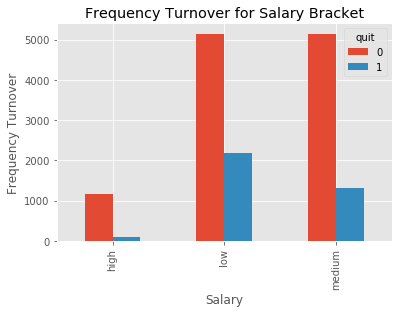

In [4]:
pd.crosstab(hr.salary, hr.quit).plot(kind='bar')
plt.title('Frequency Turnover for Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency Turnover')
plt.show()

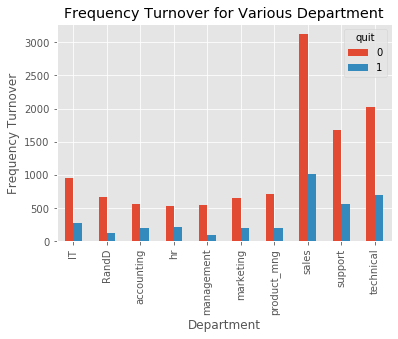

In [5]:
pd.crosstab(hr.department, hr.quit).plot(kind='bar')
plt.title('Frequency Turnover for Various Department')
plt.xlabel('Department')
plt.ylabel('Frequency Turnover')
plt.show()

## Encode Catogorical Features

In [6]:
cat_features = ['department','salary']
for cat in cat_features:
    cat_df = pd.get_dummies(hr[cat], prefix=cat)
    hr = hr.join(cat_df)

In [7]:
pd.set_option('display.max_columns', 50)

In [8]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [9]:
hr.drop(columns=['department','salary'], inplace=True)

## Visualize Class Balance

In [13]:
from yellowbrick.target import ClassBalance
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

ModuleNotFoundError: No module named 'yellowbrick'

In [14]:
visualizer = ClassBalance(labels=['Stayed','Quit']).fit(hr.quit)
visualizer.show()

NameError: name 'ClassBalance' is not defined

## Create Training and Test Sets

In [10]:
X = hr.loc[:,hr.columns != 'quit']
y = hr.quit

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=0, test_size = 0.2, stratify=y)

## Interactive DecisionTree Classifier

In [13]:
!conda install python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         125 KB
    certifi-2020.4.5.1         |           py36_0         155 KB
    openssl-1.1.1g             |       h7b6447c_0         2.5 MB
    python-graphviz-0.13.2     |             py_0          24 KB
    ------------------------------------------------------------
                                           Total:         2.8 MB

The following NEW packages will be INSTALLED:

  python-graphviz    pkgs/main/noarch::python-graphviz-0.13.2-py_0

The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1f-h516909a_0 --> pkgs/main::openssl-1.1.1g-h7b6447c_0

The following packages will be SUPERSEDED by a high

In [14]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from graphviz import Source
from IPython.display import SVG
from IPython.display import display
from IPython.display import Image
import ipywidgets
from subprocess import call
import matplotlib.image as mpimg
from sklearn.externals.six import StringIO
import pydotplus

In [15]:
from ipywidgets import interact,IntSlider

In [24]:
@interact
def plot_tree(crit=['gini','entropy'],
             split=['best','random'],
             depth=IntSlider(min=1, max=30, value=2,continous_update=False),
             min_split=IntSlider(min=2, max=5, value=1, continous_update=False),
             min_leaf=IntSlider(min=1, max=5, value=1, continous_update=False)):
    
    estimator = DecisionTreeClassifier(random_state=0,
                                      criterion=crit,
                                      splitter = split,
                                      max_depth= depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf = min_leaf)
    
    estimator.fit(X_train,y_train)
    print('Decision Tree Train Accuracy : {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train) ) ) )
    print('Decision Tree Test Accuracy : {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test) ) ) )
    
    graph = Source(export_graphviz(decision_tree = estimator,out_file=None,
                                   feature_names =X_train.columns,
                                   class_names = ['stayed', 'quit'],
                                  filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Interactive Random Forest Classifier

In [25]:
@interact
def plot_tree_rf(crit=['gini','entropy'],
             bootstrap=['True','False'],
             depth=IntSlider(min=1, max=30, value=2,continous_update=False),
             forests=IntSlider(min=1, max=200, value=100,continous_update=False),
             min_split=IntSlider(min=2, max=5, value=1, continous_update=False),
             min_leaf=IntSlider(min=1, max=5, value=1, continous_update=False),
                Forest_Number=IntSlider(min=0, max=200, value=0, continous_update=False)):
    
    estimator = RandomForestClassifier(random_state=1,
                                       criterion=crit,
                                      bootstrap = bootstrap,
                                       n_estimators = forests,
                                      max_depth= depth,
                                      min_samples_split=min_split,
                                      min_samples_leaf = min_leaf,
                                      n_jobs=-1,
                                      verbose=False)
    estimator.fit(X_train,y_train)
    
    print('Decision Tree Train Accuracy : {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train) ) ) )
    print('Decision Tree Test Accuracy : {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test) ) ) )
    num_tree = estimator.estimators_[Forest_Number]
    print('Visualization Tree', 0)
    graph = Source(export_graphviz(num_tree,out_file=None,
                                   feature_names =X_train.columns,
                                   class_names = ['stayed', 'quit'],
                                  filled = True))
    
    display(Image(data=graph.pipe(format='png')))
    
    return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance and Evaluation Metrics 

In [27]:
!conda install -c districtdatalabs yellowbrick -y

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - yellowbrick


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    attrs-19.3.0               |             py_0          39 KB
    blas-1.0                   |         openblas          46 KB
    dbus-1.13.12               |       h746ee38_0         501 KB
    gst-plugins-base-1.14.0    |       hbbd80ab_1         4.8 MB
    gstreamer-1.14.0           |       hb453b48_1         3.1 MB
    importlib_metadata-1.5.0   |           py36_0          48 KB
    joblib-0.14.1              |             py_0         201 KB
    matplotlib-3.1.3           |           py36_0          21 KB
    matplotlib-base-3.1.3      |   py36hef1b27d_0         5.0 MB
    more-itertools-8.2.0       |             py_0          41 KB
    packaging-20.3             |             py_0     

In [29]:
from yellowbrick.model_selection import FeatureImportances
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

ImportError: cannot import name 'MultiOutputMixin'

In [ ]:
# Random Forest Feature Importances

rf = RandomForestClassifier(bootstrap='True', class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=1, verbose=False,
            warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train,y_train)
viz.show()

In [ ]:
dt = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train,y_train)
viz.show()

In [ ]:
# ROC curve for RandomForest
from yellowbrick.classifier import ROCAUC

visualzer = ROCAUC(rf, classes=['stayed','quit'])
visualzer.fit(X_train, y_train)
visualzer.score(X_test, y_test)
visualzer.poof()

In [ ]:

# ROC curve for DecisionTree
visualzer = ROCAUC(dt, classes=['stayed','quit'])
visualzer.fit(X_train, y_train)
visualzer.score(X_test, y_test)
visualzer.poof()